In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np 
import pandas as pd 
import os

In [3]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random

In [5]:
#Give dataset path
train_path = '/content/drive/MyDrive/1_final_thesis/train test valid /train'
test_path = '/content/drive/MyDrive/1_final_thesis/train test valid /test'


In [6]:
train_datagen = ImageDataGenerator(
   rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    
)

test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 4379 images belonging to 12 classes.
Found 1245 images belonging to 12 classes.


In [7]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 12))

In [8]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)



{'baby': 0, 'bottle': 1, 'box': 2, 'defect': 3, 'electronics': 4, 'illegal': 5, 'luggage': 6, 'medicine': 7, 'metal': 8, 'person': 9, 'pet': 10, 'sport': 11}


In [9]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

In [10]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [11]:
base_model.trainable = False

In [12]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(1024, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(12, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
# batch_size = 32
# epochs = 5
# steps_per_epoch = train_generator.n // batch_size
# validation_steps = validation_generator.n // batch_size

history =model.fit(
  train_generator,
  validation_data=test_generator,
  epochs=5,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator),
     verbose=2,)

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/JpegImagePlugin.py:792: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


137/137 - 1931s - loss: 3.7935 - accuracy: 0.5901 - val_loss: 1.2484 - val_accuracy: 0.5944 - 1931s/epoch - 14s/step
Epoch 2/5
137/137 - 195s - loss: 0.7903 - accuracy: 0.7314 - val_loss: 1.0764 - val_accuracy: 0.6594 - 195s/epoch - 1s/step
Epoch 3/5
137/137 - 194s - loss: 0.6565 - accuracy: 0.7831 - val_loss: 1.0528 - val_accuracy: 0.6731 - 194s/epoch - 1s/step
Epoch 4/5
137/137 - 192s - loss: 0.5787 - accuracy: 0.8143 - val_loss: 0.9828 - val_accuracy: 0.6811 - 192s/epoch - 1s/step
Epoch 5/5
137/137 - 200s - loss: 0.5467 - accuracy: 0.8180 - val_loss: 1.0002 - val_accuracy: 0.6843 - 200s/epoch - 1s/step


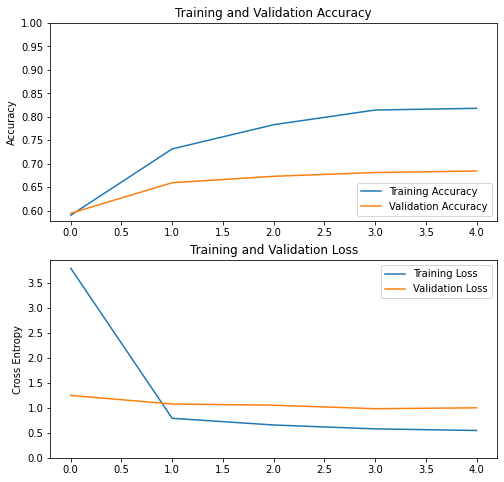

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

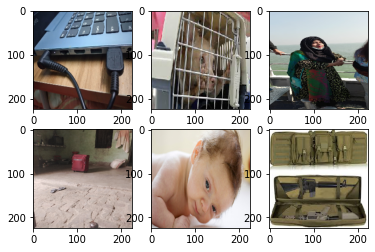

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = '/content/drive/MyDrive/1_final_dataset/train test valid /test'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

1/1 [==============================] - 0s 25ms/step
(1, 12)
defect


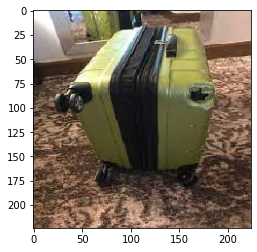

In [26]:
img_path = '/content/drive/MyDrive/1_final_thesis/train test valid /test/defect/defect(281).jpg'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis])
print(p.shape)
predicted_class = label[np.argmax(p)]
print(predicted_class)

# RUN TILL THIS CELL 